# Ant Colony Optimization - Python

## Introduction

Ant Colony Optimization(ACO) is an optimization algorithm used to find the shortest path between points or nodes. It is developed by observing the behaviour of ants when they follow a path to their food source. Ants are essentially blind so they follow pheromone trails left behind by other ants on the path.
This algorithm follows the same approach by using the probability of going to the next node as the distance to the node and the amount of pheromones.

## Implementation

The implementation of this algorithm is done in python using a few third party libraries and is fairly optimized for speed.
The stack used for this is as given below:  
[Python3](https://www.python.org/) Main coding language  
[Numpy](http://www.numpy.org/) For vectorized mathematical processing  
[Pandas](https://pandas.pydata.org/) To read data files  
[Matplotlib](https://matplotlib.org/) Graph plotting  
[Seaborn](https://seaborn.pydata.org/) Graph Styling(optional)
  
The environment for testing is:  
[Kubuntu 18.04](https://kubuntu.org/)

## Problem Description

For an example problem we will solve the "Travelling salesman problem", with the locations of [Post Offices in Montgomery County, MD.](https://catalog.data.gov/dataset/post-offices-2aec7/resource/09f8f523-e2e7-41c4-81b5-40b5c387fead?) and will find the shortest path to travel in a closed path between all these locations. All the locations are in longitude, latitude form.

## Algorithm Steps

### 1. Initialize ants

First we select an arbitrary number of ants and place them on random positions of the given path.

### 2. Move ants via probability

Then for each of the ants we complete a closed path i.e. from start, covering all the nodes and without repeating any of the nodes.  
To move an ant from one node to the next we use the following formula.
$$\frac{\tau_{ij}^\alpha + \eta_{ij}^\beta}{\sum (\tau^\alpha + \eta^\beta)} $$
Where $\tau$ is the amount of pheromones and $\eta$ is the inverse of the distance i.e. $1/d$  
$\alpha$ and $\beta$ are the algorithm's parameters. They are used to give more or less weight to the distance or pheromones while selecting the next node.

### 3. Deposit of pheromones

When an ant moves from a node to the next it leaves a trail for the next ant to follow, the more ants follow the same path, the stronger the pheromone trail gets. Pheromone trails are incremented by.$$\tau^{(i+1)} = \tau^i + \Delta\tau $$ Where $\Delta\tau$ is a prameter and $i$ is the iteration number.

### 4. Evaporation of pheromones

After each iteration the pheromones also tend to evaporate. The evaporation of pheromones are given as. $$\tau^{(i+1)} = (1 - \rho)\tau^i $$ where $\rho$ is the evaporation rate.

### 5. Termination Condition

We can use any condition to terminate the search, such as a distance below a certain threshold. In this implementation we use the number of iterations as the termination condition for the search.

## Results

First we initialize the environment.

In [1]:
%matplotlib inline
from aco import *
import numpy as np
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("notebook")

Then we import our data source

In [2]:
# Read CSV data file
post_off_data = pandas.read_csv("Post_Offices.csv")
# Create array of latitude and longitude
space = np.array([post_off_data.values[:, 6], post_off_data.values[:, 7]], dtype=np.float_)
# Rearrange data
space = np.swapaxes(space, 0, 1)

Then we run the algorithm

In [3]:
min_path, min_distance = run_aco(space, 100, 30, 1, 0.5, 1, 0.5)

Finally we plot the results

Minimum distance is: 3.2570447420604483 (Euclidean)


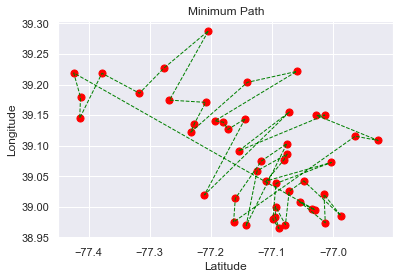

In [5]:
# Print minimum distance
print("Minimum distance is: {} (Euclidean)".format(min_distance))
# Place the data nodes

plt.scatter(space[:, 0], space[:, 1], c='r', marker='o', s=50.0)
# Plot the minimum path
plt.plot(space[min_path, 0], space[min_path, 1], c='g', linewidth=1.0, linestyle='--')
# Set plot properties
plt.title("Minimum Path")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
# Show plot
plt.show()